# Hello and welcome to the MSCAR 2023 Hackathon!

## This is our tutorial for how to start getting into the realm of cloud masking
At this point, we are assuming that you had read through the README file and have done the following:
-  Installed python
-  Installed conda or anaconda onto your device
-  Set up and installed your conda environment with all the required packages
-  Installed wget
-  Ran scripts to download and process the ASTER data

Since we are opening this to any student attending MSCAR, we want to attempt to give everyone a fair change at working on this research topic. In order to do this, we want to give a very quick tutorial on the many capabilities of python and how to use various helpful packages. We would say that if you have never coded in python before, we highley recommend going through the Python Tutorials provided by w3schools which will go more into depth on fundamental python(https://www.w3schools.com/python/).

## Step 1: Import your packages
As a first step always, we need to import all the packages we will want to use that are not native to python. This will provide tools to easily read and write from different data files, visualize data, and edit data

In [92]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd 
import seaborn as sn
import xarray as xr

# %matplotlib notebook

## Step 2: Quick Python Basics
Within this step, we will quickly go over how to print, lists, for-loops, etc.

Always as a good first step into python, let's go over lists in python
Lists are very similiar to Arrays in other programming languages.
Pretty much we can create a variable that stores multiple data in succession

In [2]:
list_of_stuff = [1,2,3.0,'I love clouds' , True, [5,6,7]]
print(list_of_stuff)

[1, 2, 3.0, 'I love clouds', True, [5, 6, 7]]


As we can see above, we have a list called 'list_of_stuff' that contains 2 integers, than a floating point number, the text 'I love clouds', a boolean value of True, and another list of integers. If you are unfamilair with these data types, I encourage you to read this page: https://www.w3schools.com/python/python_datatypes.asp

One of the most important parts of using lists, is knowing how many elements are in your list. We can do this by passing our list into the __len()__ command

In [3]:
len(list_of_stuff)

6

Note that this command returns that there are 6 elements in our list_of_stuff, and __does not__ count the elements of the 2nd list.

Next, let's understand how to access specific entries in our list and how indexing works! Lists in python are what we call zero-indexed. This means if we were to count through the elements of a list, instead of starting with 1 (i,e 1, 2, 3, 4... etc.), we instead would start at 0 (i.e 0, 1, 2, 3, 4, ... etc.). So if we want to look at just the first element in our list, we would use index 0:

In [4]:
list_of_stuff[0]

1

As a next step, let's create a variable with your name stored in it: Please add your name in-between the quotation marks:

In [5]:
# as an example... I would put: Name = "Joseph"
Name = " "

Next, let's add your name to our list_of_stuff with the __append__ command

In [6]:
list_of_stuff.append(Name)
print(list_of_stuff)

[1, 2, 3.0, 'I love clouds', True, [5, 6, 7], ' ']


As we can see above, the __append()__ command adds a copy of what we pass in at the end of our list.

If we wanted to replace something in a certain spot in our list, we can do so by using the index of the element we want to replace and setting it equal to what we want in-place:

In [7]:
list_of_stuff[1] = Name
print(list_of_stuff)

[1, ' ', 3.0, 'I love clouds', True, [5, 6, 7], ' ']


As q quick re-cap, we can also create for-loops that will iterate code N times. For example, below we loop N=10 times, such that we go from 0->9. i is the variable in place that retains the value in our step of __range()__:

In [8]:
print(range(10))

range(0, 10)


In [9]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


We can then use this to loop through our list:

In [10]:
for i in range(len(list_of_stuff)):
    print(i)

0
1
2
3
4
5
6


In [11]:
for i in range(len(list_of_stuff)):
    print(list_of_stuff[i])

1
 
3.0
I love clouds
True
[5, 6, 7]
 


Another way of doing this is with the following syntax: 

In [12]:
for i in list_of_stuff:
    print(i)

1
 
3.0
I love clouds
True
[5, 6, 7]
 


This is what we call pythonic code. In other programming languages, you would always have to use the first syntax. However, since we loop over lists and different data objects all the time, python has a clear and cut easy way to loop over each entry within objects like lists, dictionaries, etc.

We can also look at the data types of each element in our list that makes sure we understand what we are dealing with:

In [13]:
for i in list_of_stuff:
    print(type(i))

<class 'int'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'bool'>
<class 'list'>
<class 'str'>


Below is a quick recap of how boolean logic works:

In [14]:
x = 1
y = 2
z = 3

print(x==1)
print(y<2)
print(y<=2)
print(x>z)
print(not x>z)
print(x in list_of_stuff)

True
False
True
False
True
True


## Step 3: Read in your data
Within this step, we will quickly go over accessing files & directories (folders) through python, and how to read in netCDF4 files

In order to make sure our code works no matter what type of computer we are using, we will have to use the __os__ library that we imported in __cell [1]__. This library imports your systems operating system (Windows, MacOS, Linux, etc.) and uses it's specified logic to perform certain operations. For example, we have to use this since on windows, folders/directoires are seperated with the symbol '\', where in Linux and MacOS they use the symbols '/'. If we didn't use the os system, then our code for a Mac would not work for Windows computer! And vice-versa!

In [15]:
import os

To make life simple for us, we can us __os.path.join()__ that will allow us to pass in nested directories as comma seperated strings:

In [16]:
directory = os.path.join('..','training_data')
print(directory)

../training_data


Next we can use os.listdir() to list all the files in the directory we provide. We then make a quick check to make sure that the file we grab is a netCDF file (.nc). We do this since sometimes different operating systems will add random files to directories for easy access that we want to ignore

In [17]:
file_paths = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if f[-2:] == 'nc':
        file_paths.append(f)

In [18]:
file_paths

['../training_data/AST_09202004142335.nc',
 '../training_data/AST_09252004144307.nc',
 '../training_data/AST_10242004141253.nc',
 '../training_data/AST_09272004143018.nc',
 '../training_data/AST_10182004144818.nc',
 '../training_data/AST_09252004144232.nc',
 '../training_data/AST_10022004144804.nc',
 '../training_data/AST_11282004144333.nc',
 '../training_data/AST_11282004144111.nc',
 '../training_data/AST_11282004144257.nc',
 '../training_data/AST_09202004142344.nc',
 '../training_data/AST_11282004144306.nc',
 '../training_data/AST_10182004144928.nc',
 '../training_data/AST_12022004141642.nc',
 '../training_data/AST_10202004143629.nc',
 '../training_data/AST_09272004143009.nc',
 '../training_data/AST_11282004144120.nc',
 '../training_data/AST_09222004141259.nc',
 '../training_data/AST_09202004142250.nc',
 '../training_data/AST_11282004144155.nc',
 '../training_data/AST_09202004142445.nc',
 '../training_data/AST_09152004140614.nc',
 '../training_data/AST_10252004145412.nc',
 '../traini

Next we will will open one of these files. We will just grab the first file in our list of files. To open a netCDF file in xarray, we need to use the open_dataset() command that will read in the specific .nc file formatting. 

In [33]:
ds_1 = xr.open_dataset(file_paths[10])
ds_1

<xarray.Dataset>
Dimensions:  (Bands: 4, x: 2000, y: 2000)
Coordinates:
  * Bands    (Bands) object 'Band_3N' 'Band_6' 'Band_14' 'Cloud_Mask'
Dimensions without coordinates: x, y
Data variables:
    data     (Bands, x, y) float64 ...

In [34]:
print(ds_1)

<xarray.Dataset>
Dimensions:  (Bands: 4, x: 2000, y: 2000)
Coordinates:
  * Bands    (Bands) object 'Band_3N' 'Band_6' 'Band_14' 'Cloud_Mask'
Dimensions without coordinates: x, y
Data variables:
    data     (Bands, x, y) float64 ...


Comparing the two cells above, we can see that if we use the print() command v.s. just 'dropping' the variable, they perform very similiarly but the first cell allows us to interact with the arrows and attributes. 

Try clicking on the cylinder next to the 'Bands' data. When doe, it lists the bands within the file we opened. 

These cells react differently since xarray has special functionality when using jupyter notebook. However, if you were running this in a python script (which you will need to do when you submit) you may need to use the print command instead to look at the xarray object.

Now we will convert our data to a numpy array. First we will need to select our _data_ attribute, then run the to_numpy() command on it to convert it.

In [35]:
ds_1_data = ds_1.data.to_numpy()

numpy is a very useful library where we can have data stored very similiarly to python lists, but they have additional features and operations that help.

For example, a numpy array has to retain a specific 'shape'. This means that if we have a matrix of dimensions MxN, this means that the array will always be this size unless we perform operations to change these sizes. In our data, for example, we have C,M,M shape. Where C is the bands or channels of our data, and M=2000 pixels (where each pixel spans 15 meters on the earths surface)

In [36]:
print(ds_1_data.shape)

(4, 2000, 2000)


Remember that each channel represents a different band. To know what bands are what, we can check our original xarray variable:

In [37]:
print(ds_1.Bands.to_numpy())

['Band_3N' 'Band_6' 'Band_14' 'Cloud_Mask']


To look at all the unique values in a np data object, we can use np.unique(). In the statement below, we can see that the cloud mask band only has values of 1 and 0. This is because 1's correspond to clouds and 0's correspond to clear-sky

In [38]:
np.unique(ds_1_data[-1,:,:])

array([0., 1.])

## Step 4: Visualize your data
Now that we have successfully read in our data, let's actually take a look at what remote sensing data looks like!

First, lets grab our first band and the corresponding cloud mask:

In [56]:
band1 = ds_1_data[0]

In [57]:
cloud_mask = ds_1_data[-1]

With our data now, we can use matplotlib.pyplot to create figures and diagrams of our data. When we imported this package to this script we renamed it plt for short (see cell [1]). With matplotlib, we can use the __figure()__ command to create a figure 'window' to plot to (this is more important when not in a jupyter notebook like this one). Next, we can use the __imshow()__ command to display 2D data (like a picture) to this figure. In this case, we show the satelitte image from our first band. Lastly, we use the __colorbar()__ command to add a coloarbar so we can look at what the values are within our image.

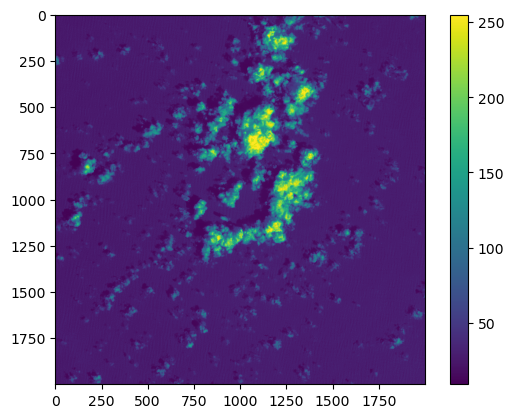

In [58]:
plt.figure()
plt.imshow(band1)
plt.colorbar()

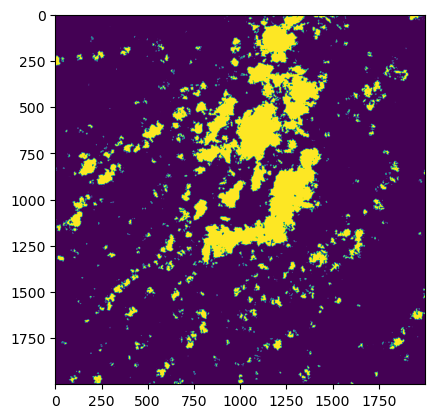

In [59]:
plt.figure()
plt.imshow(cloud_mask)

We can also crop our band to zoom in on a specific area to investigate what the clouds look like. We also will change what color mapping we use to have a better picture of what we are looking at.

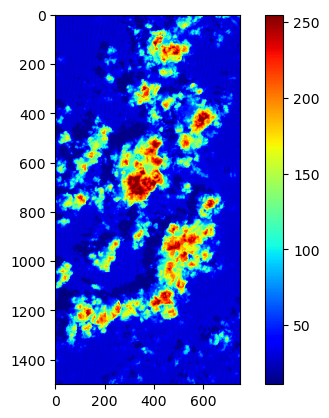

In [44]:
plt.figure()
plt.imshow(ds_1_data[0, 0:1500,750:1500], cmap='jet')
plt.colorbar()

## Step 5: Creating you first cloud mask 'model' 
In this step, we will now figure how to create a single and double threshold model for our training dataset

Now that we understand how to look at the truth cloud masks, lets try and recreate it by implementing our first 'model'. For this we are going to create a simple thresholding technique.

A single threshold model uses the idea that we can create a cloud mask by taking a band's data B, and applying a threshold to derive if a pixel is cloudy or not. For example, the logic will be: if B > threshold -> it is a cloud, if not, it is clear sky.

In [45]:
our_cloud_mask = band1 > 150

<Figure size 640x480 with 0 Axes>

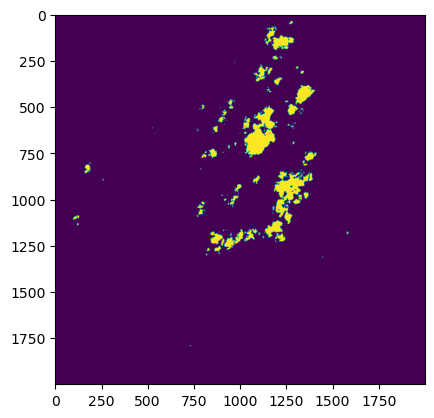

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure()
plt.imshow(our_cloud_mask)
plt.figure()

Looking at the figure above, and comparing it to the true cloud mask in cell [30], we can see that our threshold is far too high and that we miss many cloudy pixels.

Let's try lowering it to capture more clouds

<Figure size 640x480 with 0 Axes>

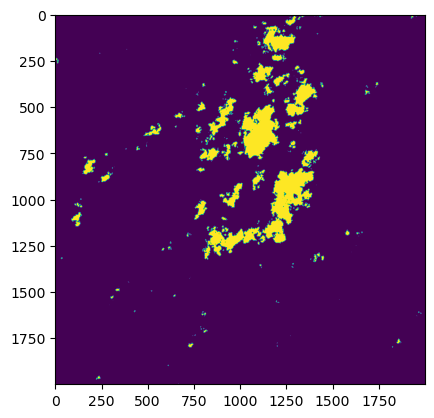

<Figure size 640x480 with 0 Axes>

In [47]:
our_cloud_mask = band1 > 100
plt.figure()
plt.imshow(our_cloud_mask)
plt.figure()

Looking better! but still not quite there.... We can investigate the differences between our cloud mask and the truth by subtracting them from one another:

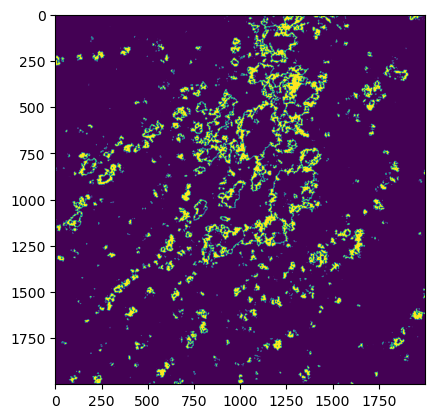

In [48]:
difference = cloud_mask - our_cloud_mask
plt.figure()
plt.imshow(difference)

From here you can adjust the threshold more and more to try and replicate the original.

It may be further helpful to look at the distribution of the digital numbers within our image to try and capture the threshold of the cloud.

We can do this by generating a histogram of the values at this band:

(array([3.561500e+04, 1.574520e+05, 2.203220e+05, 1.611366e+06,
        1.226958e+06, 1.733690e+05, 6.793700e+04, 4.986600e+04,
        4.040300e+04, 3.355800e+04, 2.841600e+04, 2.547500e+04,
        1.802300e+04, 2.063600e+04, 1.890400e+04, 1.727800e+04,
        1.618800e+04, 1.518400e+04, 1.393000e+04, 1.326800e+04,
        1.264000e+04, 1.236100e+04, 1.193100e+04, 1.142100e+04,
        8.871000e+03, 1.045700e+04, 1.005900e+04, 9.438000e+03,
        9.003000e+03, 8.490000e+03, 7.900000e+03, 7.947000e+03,
        7.626000e+03, 7.157000e+03, 6.566000e+03, 6.130000e+03,
        5.703000e+03, 4.070000e+03, 4.828000e+03, 4.326000e+03,
        3.921000e+03, 3.621000e+03, 3.200000e+03, 2.891000e+03,
        2.582000e+03, 2.357000e+03, 2.211000e+03, 1.892000e+03,
        1.591000e+03, 4.662000e+03]),
 array([  9.  ,  13.92,  18.84,  23.76,  28.68,  33.6 ,  38.52,  43.44,
         48.36,  53.28,  58.2 ,  63.12,  68.04,  72.96,  77.88,  82.8 ,
         87.72,  92.64,  97.56, 102.48, 107.4 , 11

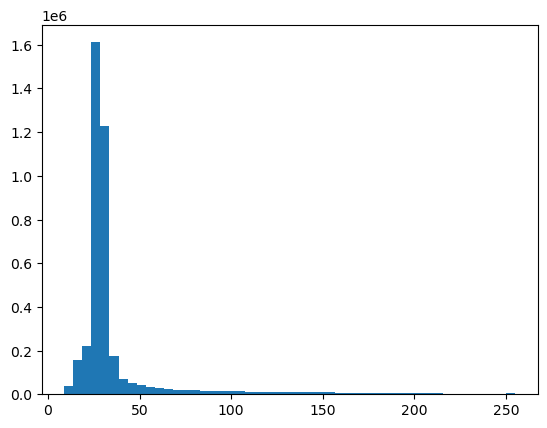

In [67]:
plt.figure()
plt.hist(band1.flatten(), bins=50)

## Step 6: Generate accuracy measurements
Now that we have some pre-liminary models running, let's see how well they do

Once you have a threshold picked, or a model created, we can now check to see how well we are doing by running it against our testing dataset

First let's read in all the testing data:

In [70]:
testing_directory = os.path.join('..','testing_data')
testing_data_bands = np.zeros((len(os.listdir(testing_directory)),3,2000,2000))
testing_data_cloud_mask = np.zeros((len(os.listdir(testing_directory)),2000,2000))


file_num = 0
for filename in os.listdir(testing_directory):
    f = os.path.join(testing_directory, filename)
    # checking if it is a file
    if f[-2:] == 'nc':
        ds_test = xr.open_dataset(f)
        img_bands = ds_test.data.to_numpy()[:-1]
        testing_data_bands[file_num, :, :, :] = img_bands
        testing_data_cloud_mask[file_num, :, :] =  ds_test.data.to_numpy()[-1]

Great! Feel free to take a look at the data if you want!

Next let's formalize our model into a function that we can run on any image. Pretty much we will abstract our thresholding method to be runnable on any image that we want to provide. Feel free to replace the 100 with whatever threshold you decided, or if you are going above and beyond, feel free to add any new logic for your model (i.e. multi bands threhsolds, calculations of mean or std, etc.)

In [75]:
def model_1(img):
    return (img > 100)

Now, we want to generate new cloud masks with our model on the testing data:

In [82]:
new_cloud_masks = np.zeros((testing_data_cloud_mask.shape))
for img_num in range(testing_data_bands.shape[0]):
    new_cloud_masks[img_num] = model_1(testing_data_bands[img_num, 0])

Fantastic! Now we have the new cloud masks, we can see how well we are doing! One great way to see how we are doing is to create a confusion matrix!

A confusion matrix is a simple figure that comapres the labels of a predicition with the labels of the truth. Fromt this we can look at false positives or false negatives, and look at accuacy of our model! __This may take a bit to run__

In [86]:
confusion_matrix = np.zeros((2,2))
for img_num in range(testing_data_bands.shape[0]):
    truth = testing_data_cloud_mask[img_num].flatten()
    prediction = new_cloud_masks[img_num].flatten()
    for t, p in zip(truth, prediction):
        confusion_matrix[int(t),int(p)] += 1
total_pixels = np.sum(confusion_matrix)
confusion_matrix = (confusion_matrix/total_pixels) * 100

Text(0.5, 47.7222222222222, 'Prediction')

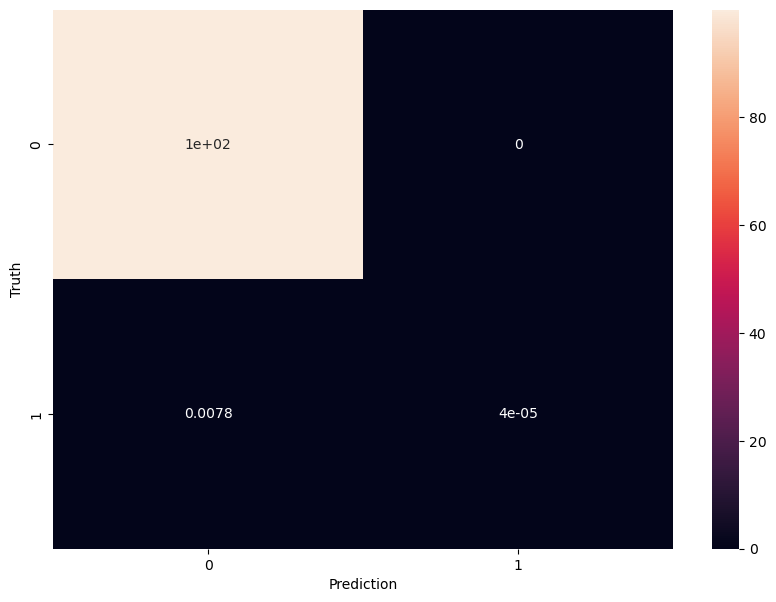

In [102]:
plt.figure(figsize = (10,7))
# categories = ['Cloudy', 'Clear Sky']
sn.heatmap(confusion_matrix, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')

This is great and all, but there is one small issue.... If we look at the counts of cloudy vs clear sky pixels, there is an overwhelming majority of clear sky pixels, which will atrifically make it seem like our model is doing great:

In [90]:
np.unique(testing_data_cloud_mask, return_counts=True)

(array([0., 1.]), array([203984057,     15943]))

Really, we should just check how many of the cloudy labels we get right (since our threshold of 100 is most likely never going to classify clear sky pixels of ocean as cloud). This metric is also called precision.

In [91]:
correct_counts = 0
total_cloudy_pixels = 0
for img_num in range(testing_data_bands.shape[0]):
    truth = testing_data_cloud_mask[img_num].flatten()
    prediction = new_cloud_masks[img_num].flatten()
    for t, p in zip(truth, prediction):
        if t == 1:
            if t == p:
                correct_counts +=1
            total_cloudy_pixels+=1
print(f'Model_1 has an accuracy of {(correct_counts/total_cloudy_pixels) * 100}%')

Model_1 has an accuracy of 0.5143323088502791%


Now we can really see our model is not doing too hot

This is where you come in!

## Step 7: Explore and Develope
At this point, we have gone over how to:
-  Read in ASTER data
-  Visualize our satelitte data
-  Create simple models
-  Check our accuracy of our model

From here, you can use these skills to develope better and more robust models for cloud detection. If you are lacking inspiration, feel free to read up on the more advanced algorithms out there such as FMask, MOD35, etc. All of these cloud masks fundamentally use thresholding to determine cloudiness, similiar to your own model, the difference being they use many more thresholds accross different bands.  

It may be further beneficial to read a few of the following papers, that give some information on what we can learn from clouds at these different spectral wavelengths.

Lastly, for those of you that want a larger challenge, cloud masking recently has been going through a slow process of 'modernization'. By this, many researchers are looking into how machine learning algorithms have been able to be use to detect certain objects in images, such as cats, dogs, cars, etc. These same concepts have started to been used to detect clouds. You may ask, why would we want to use such algoirthms? It's because currently, our best cloud masks do have substantial error since we only use spectral information... but there is also spatial and temporal patterns that can be exploited to detect clouds!

If interested in these concepts, feel free to read up on concepts on decision trees, support vector machines, regressions, convolutions, and neural networks! It may lead you to find some interesting skills that could help in this problem... or many more!

Finally, if you enjoyed this project and want to learn more about research for cloud masking, feel free to email Joseph Nied, a co-author of this Hackathon at jdnied2@illinois.edu